In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File Settings
filepath = 'public/data/raw/perfil_eleitor_PI.csv'
encoding = 'ISO-8859-1'
separator = ';'
column_names = ['DATA_GERACAO', 'HORA_GERACAO', 'PERIODO', 
                'UF', 'COD_MUNICIPIO_TSE', 'MUNICIPIO', 
                'NUM_ZONA', 'NUM_SECAO', 'COD_ESTADO_CIVIL', 
                'ESTADO_CIVIL', 'COD_FAIXA_ETARIA', 'FAIXA_ETARIA', 
                'COD_GRAU_ESCOLARIDADE', 'GRAU_ESCOLARIDADE', 
                'COD_SEXO', 'SEXO', 'QTD_ELEITORES_NO_PERFIL'
               ]

# Each line of the file represents a profile for voters in the state of Piauí in 2016
df = pd.read_csv(filepath, 
                 encoding = encoding, 
                 sep = separator, 
                 names = column_names)
df

,DATA_GERACAO,HORA_GERACAO,PERIODO,UF,COD_MUNICIPIO_TSE,MUNICIPIO,NUM_ZONA,NUM_SECAO,COD_ESTADO_CIVIL,ESTADO_CIVIL,COD_FAIXA_ETARIA,FAIXA_ETARIA,COD_GRAU_ESCOLARIDADE,GRAU_ESCOLARIDADE,COD_SEXO,SEXO,QTD_ELEITORES_NO_PERFIL
0,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,10,SUPERIOR A 79 ANOS,1,ANALFABETO,4,FEMININO,1
1,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,1,ANALFABETO,2,MASCULINO,1
2,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,2,LÊ E ESCREVE,2,MASCULINO,3
3,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,2,LÊ E ESCREVE,4,FEMININO,2
4,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,3,ENSINO FUNDAMENTAL INCOMPLETO,2,MASCULINO,13
5,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,3,ENSINO FUNDAMENTAL INCOMPLETO,4,FEMININO,9
6,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,4,ENSINO FUNDAMENTAL COMPLETO,2,MASCULINO,2
7,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,4,ENSINO FUNDAMENTAL COMPLETO,4,FEMININO,3
8,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,5,ENSINO MÉDIO INCOMPLETO,2,MASCULINO,1
9,29/09/2016,23:05:20,2016,PI,10006,BRASILEIRA,11,119,1,SOLTEIRO,5,25 A 34 ANOS,6,ENSINO MÉDIO COMPLETO,4,FEMININO,9


In [2]:
# Zone and section codes
zones = [
    {
        'id': 2,
        'sections': [447, 368]
    },
    {
        'id': 98,
        'sections': [1, 2, 3, 4, 5, 6, 7, 227, 251, 260, 273]
    }
]

# Name of columns to select
selected_columns = ['NUM_ZONA', 
                    'NUM_SECAO', 
                    'COD_ESTADO_CIVIL', 
                    'COD_FAIXA_ETARIA', 
                    'COD_GRAU_ESCOLARIDADE', 
                    'COD_SEXO', 
                    'QTD_ELEITORES_NO_PERFIL']

tmp = df[selected_columns]

# filter profiles from zones 98 and 2
clean_df = tmp.loc[
    (
        (tmp['NUM_ZONA'] == zones[0]['id']) & (tmp['NUM_SECAO'].isin(zones[0]['sections']))
    ) | (
        (tmp['NUM_ZONA'] == zones[1]['id']) & (tmp['NUM_SECAO'].isin(zones[1]['sections']))
    )
]

# Check number of voters for zones and sections selected. 
# According to data from TRE it should be equal to 6377
print('\nTotal number of voters:', clean_df['QTD_ELEITORES_NO_PERFIL'].sum(), '\n')

# DataFrame with voters from sections in Parque Jacinta and Jóquei
clean_df


Total number of voters: 6377 



,NUM_ZONA,NUM_SECAO,COD_ESTADO_CIVIL,COD_FAIXA_ETARIA,COD_GRAU_ESCOLARIDADE,COD_SEXO,QTD_ELEITORES_NO_PERFIL
630245,2,368,1,1,3,2,1
630246,2,368,1,1,3,4,1
630247,2,368,1,1,5,2,2
630248,2,368,1,1,5,4,1
630249,2,368,1,2,5,2,5
630250,2,368,1,2,5,4,2
630251,2,368,1,3,3,2,3
630252,2,368,1,3,3,4,1
630253,2,368,1,3,4,2,1
630254,2,368,1,3,5,2,14


In [3]:
# Expand rows according to # of people in each profile

tmp = clean_df
rows_to_expand = tmp.loc[clean_df['QTD_ELEITORES_NO_PERFIL'] > 1]

# def expandRow(row):
#     expanded_df.append(row * (row['QTD_ELEITORES_NO_PERFIL']-1))
    
# tmp.apply(lambda row: expandRow(row), axis=1)
# expanded_df

expanded_df = pd.DataFrame([], columns=selected_columns)
expanded_df

for row in rows_to_expand.iterrows():
    index, data = row
    for i in range((data['QTD_ELEITORES_NO_PERFIL']-1)):
        expanded_df = expanded_df.append(data, ignore_index=True)

expanded_df = expanded_df.astype(int)

clean_df = tmp.append(expanded_df, ignore_index=True)

clean_df = clean_df.drop('QTD_ELEITORES_NO_PERFIL', 1)

# Now each row represents a voter
clean_df

,NUM_ZONA,NUM_SECAO,COD_ESTADO_CIVIL,COD_FAIXA_ETARIA,COD_GRAU_ESCOLARIDADE,COD_SEXO
0,2,368,1,1,3,2
1,2,368,1,1,3,4
2,2,368,1,1,5,2
3,2,368,1,1,5,4
4,2,368,1,2,5,2
5,2,368,1,2,5,4
6,2,368,1,3,3,2
7,2,368,1,3,3,4
8,2,368,1,3,4,2
9,2,368,1,3,5,2


In [4]:
# get individual data frames for each zone
jockey_df = clean_df.loc[clean_df['NUM_ZONA'] == 98]
pj_df = clean_df.loc[clean_df['NUM_ZONA'] == 2]

# remove unecessary columns
jockey_df = jockey_df.drop(['NUM_ZONA', 'NUM_SECAO'], 1)
pj_df = pj_df.drop(['NUM_ZONA', 'NUM_SECAO'], 1)

/home/willsoares/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


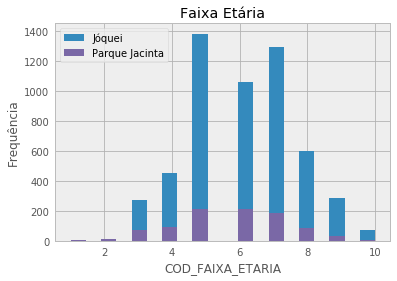

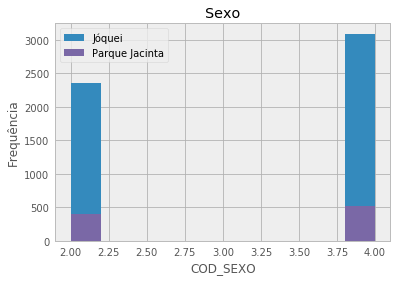

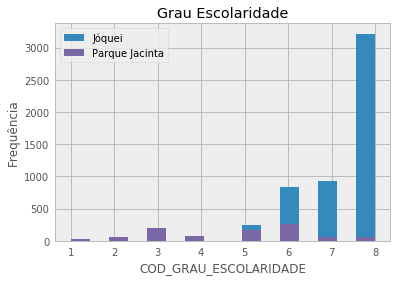

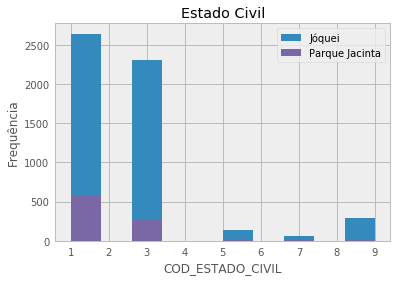

In [7]:
#  Plot histograms
histograms = [
    {
        "title": "Faixa Etária",
        "label": "COD_FAIXA_ETARIA",
        "bins": 20
    },
    {
        "title": "Sexo",
        "label": "COD_SEXO",
        "bins": 0
    },
    {
        "title": "Grau Escolaridade",
        "label": "COD_GRAU_ESCOLARIDADE",
        "bins": 16
    },
    {
        "title": "Estado Civil",
        "label": "COD_ESTADO_CIVIL",
        "bins": 0
    }
]

def plotHistogram(title, xlabel, bins):
    pd.options.display.mpl_style = 'default'
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequência")
    if bins:
        plt.hist(jockey_df[xlabel], bins=bins, label="Jóquei")
        plt.hist(pj_df[xlabel], bins=bins, label="Parque Jacinta")
    else:
        plt.hist(jockey_df[xlabel], label="Jóquei")
        plt.hist(pj_df[xlabel], label="Parque Jacinta")
    plt.legend()
    plt.show()
    
for hist in histograms:
    plotHistogram(hist['title'], hist['label'], hist['bins'])

In [6]:
# Export to a CSV file
clean_df.to_csv('./public/data/csv/voter_profile.csv', index = False)